In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
import statsmodels.formula.api as smf
from pandas import read_csv
import pandas as pd
from collections import Counter

from sklearn.preprocessing import StandardScaler
%matplotlib inline

train = pd.read_csv('dataset/sales_train.csv')
test = pd.read_csv('dataset/test.csv')
shops = pd.read_csv('dataset/shops.csv')
items = pd.read_csv('dataset/items.csv')
items_categories = pd.read_csv('dataset/item_categories.csv')
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [2]:
'''
scaler = StandardScaler().fit(train['item_price'].values.reshape(-1, 1))
train['item_price'] = scaler.transform(train['item_price'].values.reshape(-1, 1))
scaler = StandardScaler().fit(train['item_cnt_day'].values.reshape(-1, 1))
train['item_cnt_day'] = scaler.transform(train['item_cnt_day'].values.reshape(-1, 1))
train.describe()
'''

"\nscaler = StandardScaler().fit(train['item_price'].values.reshape(-1, 1))\ntrain['item_price'] = scaler.transform(train['item_price'].values.reshape(-1, 1))\nscaler = StandardScaler().fit(train['item_cnt_day'].values.reshape(-1, 1))\ntrain['item_cnt_day'] = scaler.transform(train['item_cnt_day'].values.reshape(-1, 1))\ntrain.describe()\n"

In [3]:
from datetime import datetime

#find missing date
def datekey(item):
    date, _ = item
    #print(date)
    d, m, y = date.split('.')
    #print(y+m+d)
    return y+m+d

def getdatelist(beginDate, endDate):
    date_l=[datetime.strftime(x,'%d.%m.%Y') for x in list(pd.date_range(start=beginDate, end=endDate))]
    return date_l

datelist = Counter(train['date'])
datelist = sorted(datelist.items(), key=datekey)
print(len(datelist))
#01.01.2013 - 31.10.2015

fulldatelist = getdatelist('20130101', '20151031')
print(len(fulldatelist))

1034
1034


Counter({1.0: 2163, 2.0: 136, 3.0: 20, -1.0: 3, 4.0: 2, 17.0: 1})


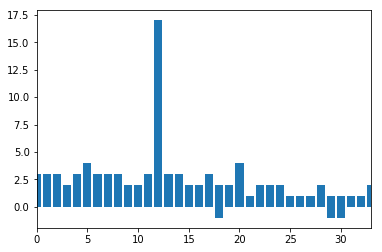

In [4]:
def bar_sale_item(data, itemid):
    selected_data = data[data.item_id==itemid]
    selected_item_cnt_day = selected_data['item_cnt_day']
    print(Counter(selected_item_cnt_day))
    plt.xlim((0,33))
    plt.bar(selected_data['date_block_num'], selected_data['item_cnt_day'])
    return

#Counter(train['date_block_num']) #34months
bar_sale_item(train, 2574)

1562733.0
1320889.0
764584.0


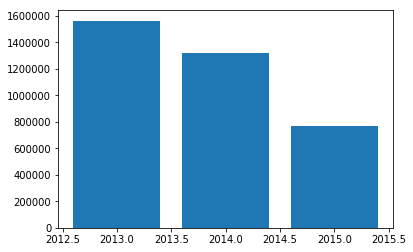

In [17]:
def sale_year(data):
    data['year'] = data['date'].str.split('.').str[2]
    total_sale = []
    for i in range(2013, 2016):
        selected_data = data[data.year==str(i)]
        print(sum(selected_data['item_cnt_day']))
        total_sale.append(sum(selected_data['item_cnt_day']))
    plt.bar(range(2013,2016), total_sale)
    return

sale_year(train)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]


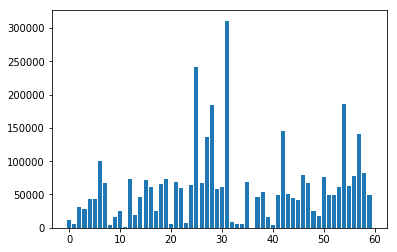

In [19]:
def sale_shopid(data):
    shopidlist = sorted(Counter(data['shop_id']))
    print(shopidlist)
    sale_of_shopid_list = []
    for i in shopidlist:
        selecteddata = data[data.shop_id==i]
        sale_of_shopid_list.append(sum(selecteddata['item_cnt_day']))
    plt.bar(shopidlist, sale_of_shopid_list)
    return

sale_shopid(train)

In [27]:
def saleitem_shopid(data):
    shopidlist = sorted(Counter(data['shop_id']))
    print(shopidlist)
    sale_of_shopid_list = []
    
    for i in shopidlist:
        print('shop',i)
        selecteddata = data[data.shop_id==i]
        g = selecteddata.groupby('item_id')
        print(g.sum())
    
    return

saleitem_shopid(train)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
shop 0
         date_block_num  shop_id  item_price  item_cnt_day
item_id                                                   
30                    9        0      2385.0          31.0
31                    7        0      3038.0          11.0
32                    7        0      2431.0          16.0
33                    3        0      2082.0           6.0
35                   11        0      2964.0          15.0
36                    1        0       357.0           1.0
40                    1        0       127.0           1.0
42                    1        0       127.0           1.0
43                    0        0       221.0           1.0
49                    2        0       254.0           2.0
51                    2        0       511.0          

         date_block_num  shop_id    item_price  item_cnt_day
item_id                                                     
27                    8       30   3396.000000           2.0
28                   14       45   1047.000000           3.0
29                    9       15    978.000000           1.0
30                  119      375   8108.333333          33.0
31                  163      315  12329.310000          28.0
32                  297      495   8917.000000          33.0
33                  344      285   4081.000000          19.0
34                   47      105   1043.000000           7.0
35                    2       15    399.000000           1.0
36                   12       45    847.000000           3.0
37                   46       75    745.000000           5.0
38                   21       15   2399.000000           1.0
39                   11       15   5499.000000           1.0
62                   46       30    798.000000           2.0
65                    3 

         date_block_num  shop_id    item_price  item_cnt_day
item_id                                                     
27                   11       28    998.000000           1.0
28                   22       84    686.000000           3.0
29                    0       28   2499.000000           1.0
30                  541     2240  26549.678571         163.0
31                  597     2128  47256.510000         104.0
32                  922     3472  36275.838571         175.0
33                  399     1148  12359.000000          43.0
34                   17       84    447.000000           3.0
35                   15      476   6783.000000          26.0
36                   16      112   1396.000000           4.0
37                   82      280   1490.000000          10.0
38                  151      168  14294.000000           6.0
39                   12       28   5499.000000           1.0
40                   86      252   2241.000000           9.0
41                    9 

         date_block_num  shop_id    item_price  item_cnt_day
item_id                                                     
28                   28      126    647.000000           3.0
30                  401     2562  20081.471429         102.0
31                  917     3150  40864.558333         102.0
32                  693     2940  18429.340000          73.0
33                  755     1974  11153.000000          45.0
34                    2       42    149.000000           1.0
35                    5      336   3192.000000           8.0
36                   36      294   1443.000000           7.0
37                   58      378   1341.000000           9.0
38                  121      168   9346.000000           4.0
39                   11       42   5499.000000           1.0
40                   73      210   1245.000000           5.0
41                    0       84    498.000000           2.0
42                  131      420   2790.000000          10.0
44                   97 

         date_block_num  shop_id  item_price  item_cnt_day
item_id                                                   
16                   20       56       58.00           1.0
27                    1       56     1998.00           1.0
28                   20      112      448.00           2.0
30                  130     1344     8196.00          27.0
31                  189     1176    12347.81          24.0
32                  687     3248    14842.00          62.0
33                  175      728     3147.00          13.0
34                   14      168      447.00           3.0
35                    2      280     1995.00           5.0
36                   32      112      207.00           2.0
37                   64      280      745.00           5.0
38                   45      112     4798.00           2.0
40                   56      280     1245.00           5.0
42                  100      392     1993.00           7.0
43                    7       56       98.00           1